In [1]:
%matplotlib inline
import math
import time
from mxnet import np
from d2l import mxnet as d2l

In [2]:
n=10000
a=np.ones(n)
b=np.ones(n)

In [3]:
class Timer:  #@save
	"""Record multiple running times."""
	def __init__(self):
		self.times=[]
		self.start()
	def start(self):
		"""Start the timer."""
		self.tik=time.time()
	def stop(self):
		"""Stop the timer and record the time in a list."""
		self.times.append(time.time()-self.tik)
		return self.times[-1]
	def avg(self):
		"""Return the average time."""
		return sum(self.times)/len(self.times)
	def sum(self):
		"""Return the sum of time."""
		return sum(self.times)
	def cumsum(self):
		"""Return the accumulated time."""
		return np.array(self.times).cumsum().tolist()

In [4]:
c=np.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f}sec'

'2.71377sec'

In [5]:
timer.start()
d=a+b
f'{timer.stop():.5f}sec'

'0.00036sec'

In [6]:
def normal(x, mu, sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

In [7]:
# Use numpy again for visualization
x=np.arange(-7,7,0.01)
# Mean and standard deviation pairs
params=[(0,1),(0,2),(3,1)]

In [8]:
x.shape,x,np.array(params).shape,[normal(x, mu, sigma) for mu, sigma in params],[normal(x, mu, sigma) for mu, sigma in params][0]

((1400,),
 array([-7.       , -6.99     , -6.98     , ...,  6.9699993,  6.9799995,
         6.99     ]),
 (3, 2),
 [array([9.1347208e-12, 9.7965932e-12, 1.0505319e-11, ..., 1.1264287e-11,
         1.0505359e-11, 9.7965932e-12]),
  array([0.00043634, 0.00044404, 0.00045186, ..., 0.00045981, 0.00045186,
         0.00044404]),
  array([7.6945991e-23, 8.5034447e-23, 9.3963829e-23, ..., 1.5082567e-04,
         1.4494786e-04, 1.3928510e-04])],
 array([9.1347208e-12, 9.7965932e-12, 1.0505319e-11, ..., 1.1264287e-11,
        1.0505359e-11, 9.7965932e-12]))

In [9]:
[normal(x, mu, sigma)for mu, sigma in params][0].asnumpy()

array([9.1347208e-12, 9.7965932e-12, 1.0505319e-11, ..., 1.1264287e-11,
       1.0505359e-11, 9.7965932e-12], dtype=float32)

In [10]:
help(d2l.plot)

Help on function plot in module d2l.mxnet:

plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None)
    Plot data points.



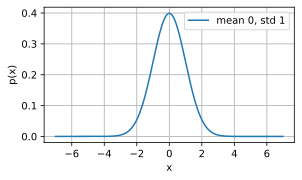

In [15]:
d2l.plot(x.asnumpy(), 
[normal(x, mu, sigma) for mu, sigma in params][0].asnumpy(),
xlabel='x',ylabel='p(x)', figsize=(4.5,2.5),
legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [12]:
t=[x.asnumpy(),x.asnumpy(),x.asnumpy()]
w=[[normal(x, mu, sigma) for mu, sigma in params][0].asnumpy(),
[normal(x, mu, sigma) for mu, sigma in params][1].asnumpy(),
[normal(x, mu, sigma) for mu, sigma in params][2].asnumpy()]

(None, list, list)

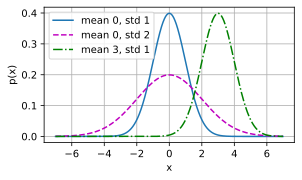

In [13]:

d2l.plot(t, w, xlabel='x',
    ylabel='p(x)', figsize=(4.5,2.5),
    legend=[f'mean {mu}, std {sigma}' for mu, sigma in params]),type(t),type(w)
   